In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
data  = pd.read_csv("train.csv")

In [146]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [147]:
x = data.corr()["SalePrice"] < 0.002


3

In [148]:
x = abs(data.corr()["SalePrice"]) < 0.05

In [149]:
x = x[x == True].index

Index(['Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [41]:
data.drop(x.to_list(), axis=1, inplace=True)

In [42]:

index = data.isnull().sum().values > 0
indexes = np.where(index == True)

In [43]:
indexes = indexes[0].tolist()

In [44]:
indexes

[2, 5, 24, 25, 29, 30, 31, 32, 34, 40, 53, 54, 55, 56, 59, 60, 67, 68, 69]

In [45]:
rid_off = data.isnull().sum().apply(lambda x: x > 500)

In [46]:
def srtrr(vrr):
    if (vrr < 200) and (vrr != 0):
        return True
    else:
        return False

In [47]:
drop = data.isnull().sum().apply(lambda x: srtrr(x))

In [48]:
fill = data.isnull().sum().apply(lambda x: x == 259)

In [49]:
x = np.where(rid_off == True)

In [50]:
a = []
for column_index in x:
    a.append(data.isnull().columns[column_index])

rid_off = a


In [51]:
y = np.where(drop == True)

In [52]:
drop

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 73, dtype: bool

In [53]:
a = []
for column_index in y:
    a.append(data.isnull().columns[column_index])

drop = a


In [54]:
z = np.where(fill == True)

In [55]:
a = []
for column_index in z:
    a.append(data.isnull().columns[column_index])

fill = a

In [56]:
p_data = data.drop(rid_off[0].to_list(), axis=1)

In [57]:
fill

[Index(['LotFrontage'], dtype='object')]

In [58]:
p_data.corr()['LotFrontage'].nlargest(3)

LotFrontage    1.000000
1stFlrSF       0.457181
LotArea        0.426095
Name: LotFrontage, dtype: float64

In [59]:
p_data["1stFlrSF"]

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

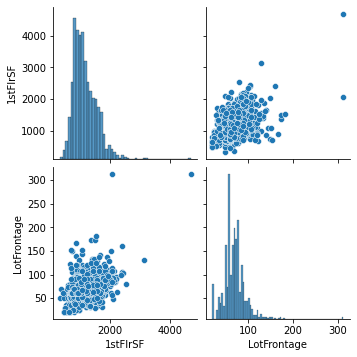

In [60]:
sns.pairplot(data=p_data[["1stFlrSF", 'LotFrontage']])

In [61]:
p_data['LotFrontage'].fillna(p_data["1stFlrSF"].apply(lambda x: x/300), inplace=True)

In [80]:
p_data["LotFrontage"].value_counts().head(1).item()

143

In [81]:
for i in p_data.columns[p_data.isnull().any(axis=0)]:
    try:     #---Applying Only on variables with NaN values
        p_data[i].fillna(p_data[i].mean(),inplace=True)
    except TypeError:
        p_data[i].fillna(p_data[i].value_counts().head(1).item(),inplace=True)

In [83]:
d_data = pd.get_dummies(p_data, drop_first=True)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
from sklearn.linear_model import Ridge

In [86]:
X = d_data.drop("SalePrice", axis=1)
y = d_data["SalePrice"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [125]:
clf = Ridge(alpha=15)

In [126]:
clf.fit(X_train, y_train)

Ridge(alpha=15)

In [127]:
from sklearn.metrics import classification_report

In [128]:
predictions = clf.predict(X_test)

In [129]:
predictions

array([160795.93988963, 182785.08889904, 114223.7281332 , 233576.4949224 ,
        72183.02292359, 178016.73164333, 215744.10733027, 180550.36796779,
       200585.01196354,  86211.14982526, 147747.1247966 , 141441.67870527,
       122961.28734433, 114344.67466778, 244644.55043005, 140469.12908602,
       392364.23267971, 119080.73685107,  84000.85820368, 108869.68343346,
       355499.47871706, 113918.16153867, 251068.7258726 , 298999.82918645,
       159248.0260218 , 193267.37325077, 303733.64253517, 180889.40555055,
       373593.54105139, 201102.2520022 , 122653.1091507 , 128163.33168757,
       176643.90923131, 126759.85699868, 188990.95889709, 109532.81064035,
       246795.33793978, 179158.71220158, 224159.34054478, 195104.14441767,
       206604.36376663, 239226.81442858, 215206.60756167, 221779.57160569,
       115539.48310256, 118330.05517812,  94566.0010847 , 256565.86819804,
       422100.68396839, 137714.50549855, 230984.80240469, 262807.4796085 ,
       167292.98027613, 1

In [93]:
y_test

1012    165000
628     135000
1101    119500
1381    237500
48      113000
         ...  
1332    100000
928     236500
1043    262280
82      245000
866     248900
Name: SalePrice, Length: 482, dtype: int64

In [130]:
from sklearn import metrics

In [131]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17696.729832164914
MSE: 866476482.1584891
RMSE: 29435.97258726963


In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19737.808494256362
MSE: 954002616.3962693
RMSE: 30886.932777410406


In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17936.38090328683
MSE: 1567374681.405765
RMSE: 39590.08311946017


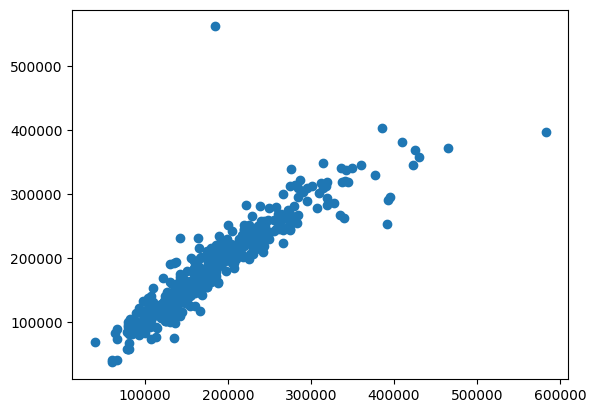

In [124]:
plt.scatter(y_test,predictions)

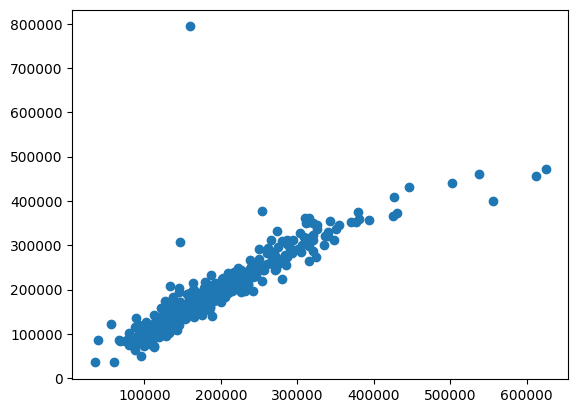

In [46]:
plt.scatter(y_test,predictions)

Now evaluating the given data.

In [180]:
smb_data = pd.read_csv("test.csv")

In [151]:
x.to_list()

['Id',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'YrSold']

In [152]:
smb_data.drop(x.tolist(), axis=1, inplace=True)

In [154]:
smb_data['LotFrontage'].fillna(smb_data["1stFlrSF"].apply(lambda x: x/300), inplace=True)


In [155]:
smb_df = smb_data.drop(rid_off[0].to_list(), axis=1)

In [156]:
smb_df.isnull().sum().values

array([ 0,  4,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1, 16, 15,  0,  0,  0, 44, 45, 44, 42,  1, 42,
        1,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,  2,
        0, 76, 78, 78,  1,  1, 78, 78,  0,  0,  0,  0,  0,  0,  1,  0],
      dtype=int64)

In [157]:
for i in smb_df.columns[smb_df.isnull().any(axis=0)]:
    try:     #---Applying Only on variables with NaN values
        smb_df[i].fillna(smb_df[i].mean(),inplace=True)
    except TypeError:
        smb_df[i].fillna(smb_df[i].value_counts().head(1).item(),inplace=True)

In [159]:
xxx = pd.get_dummies(smb_df, drop_first=True)

In [166]:
l1 = X_train.columns.to_list()

In [169]:
l2 = xxx.columns.to_list()

In [170]:
list(set(l1) - set(l2))

['RoofMatl_CompShg',
 'Exterior1st_Stone',
 'Condition2_RRAe',
 'GarageQual_Ex',
 'RoofMatl_Roll',
 'RoofMatl_Membran',
 'HouseStyle_2.5Fin',
 'Exterior1st_ImStucc',
 'Electrical_FuseA',
 'Heating_OthW',
 'Utilities_NoSeWa',
 'Exterior2nd_Other',
 'Heating_GasA',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Condition2_RRAn',
 'RoofMatl_Metal']

In [171]:
list(set(l2) - set(l1))

['SaleType_COD',
 'KitchenQual_Ex',
 'Utilities_AllPub',
 'Functional_Maj1',
 'Exterior2nd_AsbShng',
 'MSZoning_C (all)',
 'Exterior1st_AsbShng']

In [172]:
X_train.drop(list(set(l1) - set(l2)), axis=1, inplace=True)
xxx.drop(list(set(l2) - set(l1)), axis=1, inplace=True)

In [175]:
clf = Ridge(alpha=15)
clf.fit(X_train, y_train)

Ridge(alpha=15)

In [176]:
predictions = clf.predict(xxx)

In [177]:
submission_data = pd.DataFrame()

In [181]:
submission_data["Id"] = smb_data["Id"]
submission_data["SalePrice"] = predictions

In [184]:
submission_data.to_csv("submission.csv", index=False)